<a href="https://colab.research.google.com/github/yj5698/tat_kyj/blob/main/2022.11.10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing Libraries
# pip3 install graphviz
#pip3 install dask
#pip3 install toolz
#pip3 install cloudpickle
# https://www.youtube.com/watch?v=ieW3G7ZzRZ0
# https://github.com/dask/dask-tutorial
# please do go through this python notebook: https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb
import dask.dataframe as dd#similar to pandas

import pandas as pd#pandas to create small dataframes 

# pip3 install folium
import folium #open street map

# unix time: https://www.unixtimestamp.com/
import datetime #Convert to unix time

import time #Convert to unix time

# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays

# matplotlib: used to plot graphs
import matplotlib
# matplotlib.use('nbagg') : matplotlib uses this protocall which makes plots more user intractive like zoom in and zoom out
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  

# this lib is used while we calculate the stight line distance between two (lat,lon) pairs in miles
! pip3 install gpxpy
import gpxpy.geo #Get the haversine distance

from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

# download migwin: https://mingw-w64.org/doku.php/download/mingw-builds
# install it in your system and keep the path, migw_path ='installed path'
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

# to install xgboost: pip3 install xgboost
# if it didnt happen check install_xgboost.JPG
import xgboost as xgb

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 45.8 MB/s 
  Created wheel for gpxpy: filename=gpxpy-1.5.0-py3-none-any.whl size=42901 sha256=c19b69f59987d122385839503e28840d8f5e8ab4d067cd9e52ed84fd4d4a8316
  Stored in directory: /root/.cache/pip/wheels/78/49/b6/d1851fcb4ee10fa784325d7fcf6c97789157c706ab3a71e2b6
Successfully built gpxpy


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
filename_zip = '/content/drive/MyDrive/Colab Notebooks/2016_Yellow_Taxi_Trip_Data.csv'

In [8]:
month_csv = pd.read_csv(filename_zip,nrows=1000000,error_bad_lines=False)

In [9]:
print(month_csv.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'PULocationID',
       'DOLocationID'],
      dtype='object')


In [45]:
month_csv.head(100)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID
0,2,01/01/2016 12:00:00 AM,01/01/2016 12:18:30 AM,2,5.52,-73.980118,40.743050,1,N,-73.913490,...,2,19.0,0.5,0.5,0.00,0.0,0.3,20.30,NaN,NaN
1,2,01/01/2016 12:00:00 AM,01/01/2016 12:00:00 AM,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80,NaN,NaN
2,2,01/01/2016 12:00:00 AM,01/01/2016 12:00:00 AM,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,1,33.0,0.5,0.5,0.00,0.0,0.3,34.30,NaN,NaN
3,2,01/01/2016 12:00:00 AM,01/01/2016 12:26:45 AM,2,7.45,-73.994057,40.719990,1,N,-73.966362,...,2,26.0,0.5,0.5,0.00,0.0,0.3,27.30,NaN,NaN
4,2,01/01/2016 12:00:00 AM,01/01/2016 12:00:00 AM,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,2,16.5,0.0,0.5,0.00,0.0,0.3,17.30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,01/01/2016 12:01:08 AM,01/01/2016 12:23:22 AM,1,5.00,-74.002266,40.730370,1,N,-73.951683,...,1,19.5,0.5,0.5,4.50,0.0,0.3,25.30,NaN,NaN
96,2,01/01/2016 12:01:09 AM,01/01/2016 12:05:23 AM,1,0.58,-73.998077,40.737968,1,N,-74.004128,...,1,5.0,0.5,0.5,1.26,0.0,0.3,7.56,NaN,NaN
97,1,01/01/2016 12:01:09 AM,01/01/2016 12:06:37 AM,2,1.60,-73.980827,40.779640,1,N,-73.971413,...,1,6.5,0.5,0.5,1.55,0.0,0.3,9.35,NaN,NaN
98,1,01/01/2016 12:01:10 AM,01/01/2016 12:36:55 AM,2,6.00,-73.999443,40.729836,1,N,-73.964180,...,1,25.5,0.5,0.5,5.36,0.0,0.3,32.16,NaN,NaN


In [46]:
month_csv.tail(100)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID
999900,1,01/04/2016 07:43:12 AM,01/04/2016 07:49:32 AM,1,1.60,-73.951996,40.777409,1,N,-73.965340,...,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,NaN,NaN
999901,1,01/04/2016 07:43:12 AM,01/04/2016 07:51:08 AM,3,1.50,-73.957008,40.766693,1,N,-73.950577,...,1,7.5,0.0,0.5,1.50,0.0,0.3,9.80,NaN,NaN
999902,1,01/04/2016 07:43:12 AM,01/04/2016 07:53:11 AM,1,1.60,-73.992470,40.736652,1,N,-73.979240,...,1,9.0,0.0,0.5,1.00,0.0,0.3,10.80,NaN,NaN
999903,1,01/04/2016 07:43:12 AM,01/04/2016 07:56:42 AM,1,2.70,-73.973572,40.784645,1,N,-73.987679,...,1,12.0,0.0,0.5,3.80,0.0,0.3,16.60,NaN,NaN
999904,2,01/04/2016 07:43:12 AM,01/04/2016 08:02:00 AM,2,3.45,-74.008469,40.719791,1,N,-73.977943,...,2,15.0,0.0,0.5,0.00,0.0,0.3,15.80,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2,01/04/2016 07:43:28 AM,01/04/2016 07:56:35 AM,1,1.86,-73.966225,40.761936,1,N,-73.956184,...,2,10.5,0.0,0.5,0.00,0.0,0.3,11.30,NaN,NaN
999996,1,01/04/2016 07:43:28 AM,01/04/2016 07:57:30 AM,1,3.20,-73.990105,40.689705,1,N,-73.992058,...,1,13.0,0.0,0.5,1.20,0.0,0.3,15.00,NaN,NaN
999997,2,01/04/2016 07:43:30 AM,01/04/2016 07:52:20 AM,1,1.50,-73.964310,40.792500,1,N,-73.980980,...,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80,NaN,NaN
999998,1,01/04/2016 07:43:30 AM,01/04/2016 07:55:38 AM,1,2.50,-73.988037,40.737427,1,N,-73.969025,...,2,11.0,0.0,0.5,0.00,0.0,0.3,11.80,NaN,NaN


## Data Claening

In [13]:
month = dd.from_pandas(month_csv, npartitions=1)

아래 : 아웃라이어에 범위 외 데이터 저장

In [14]:
# Plotting pickup cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.pickup_longitude <= -74.15) | (month.pickup_latitude <= 40.5774)| \
                   (month.pickup_longitude >= -73.7004) | (month.pickup_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
map_osm

아래 날짜 포맷 확인 필요

In [16]:
#The timestamps are converted to unix so as to get duration(trip-time) & speed also pickup-times in unix are used while binning 

# in out data we have time in the formate "YYYY-MM-DD HH:MM:SS" we convert thiss sting to python time formate and then into unix time stamp
# https://stackoverflow.com/a/27914405
# 아래 : 함수 선언
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%m/%d/%Y %H:%M:%S %p").timetuple())



# we return a data frame which contains the columns
# 1.'passenger_count' : self explanatory
# 2.'trip_distance' : self explanatory
# 3.'pickup_longitude' : self explanatory
# 4.'pickup_latitude' : self explanatory
# 5.'dropoff_longitude' : self explanatory
# 6.'dropoff_latitude' : self explanatory
# 7.'total_amount' : total fair that was paid
# 8.'trip_times' : duration of each trip
# 9.'pickup_times : pickup time converted into unix time 
# 10.'Speed' : velocity of each trip

# month 함수를 dd로 불러왔기에 Compute 사용 가능
def return_with_trip_times(month):
    duration = month[['tpep_pickup_datetime','tpep_dropoff_datetime']].compute()
    #pickups and dropoffs to unix time
    duration_pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]
    duration_drop = [convert_to_unix(x) for x in duration['tpep_dropoff_datetime'].values]
    #calculate duration of trips
    durations = (np.array(duration_drop) - np.array(duration_pickup))/float(60)

    #append durations of trips and speed in miles/hr to a new dataframe
    new_frame = month[['passenger_count','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].compute()
    
    new_frame['trip_times'] = durations
    new_frame['pickup_times'] = duration_pickup
    new_frame['Speed'] = 60*(new_frame['trip_distance']/new_frame['trip_times'])
    
    return new_frame

# print(frame_with_durations.head())
#  passenger_count	trip_distance	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	total_amount	trip_times	pickup_times	Speed
#   1                  1.59	      -73.993896        	40.750111    	-73.974785      	40.750618           	17.05   	 18.050000	1.421329e+09	5.285319
#   1               	3.30    	-74.001648      	40.724243   	-73.994415      	40.759109           	17.80   	19.833333	1.420902e+09	9.983193
#   1               	1.80     	-73.963341      	40.802788     	-73.951820      	40.824413           	10.80   	10.050000	1.420902e+09	10.746269
#   1               	0.50    	-74.009087      	40.713818    	-74.004326       	40.719986           	4.80    	1.866667	1.420902e+09	16.071429
#   1               	3.00    	-73.971176      	40.762428    	-74.004181      	40.742653           	16.30   	19.316667	1.420902e+09	9.318378
frame_with_durations = return_with_trip_times(month)

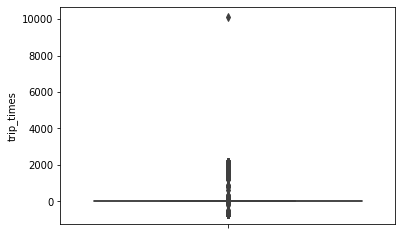

In [19]:
# the skewed box plot shows us the presence of outliers 
%matplotlib inline
sns.boxplot(y="trip_times", data =frame_with_durations)
plt.show()

In [20]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -719.8833333333333
10 percentile value is 3.183333333333333
20 percentile value is 4.716666666666667
30 percentile value is 6.133333333333334
40 percentile value is 7.616666666666666
50 percentile value is 9.25
60 percentile value is 11.183333333333334
70 percentile value is 13.633333333333333
80 percentile value is 17.116666666666667
90 percentile value is 23.383333333333333
100 percentile value is  10128.65


In [21]:
#looking further from the 99th percecntile
for i in range(90,100):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 23.383333333333333
91 percentile value is 24.4
92 percentile value is 25.566666666666666
93 percentile value is 26.9
94 percentile value is 28.533333333333335
95 percentile value is 30.55
96 percentile value is 33.233333333333334
97 percentile value is 37.233333333333334
98 percentile value is 44.11666666666667
99 percentile value is 167.33333333333334
100 percentile value is  10128.65


In [35]:
#removing data based on our analysis and TLC regulations
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_times>1) & (frame_with_durations.trip_times<360)]

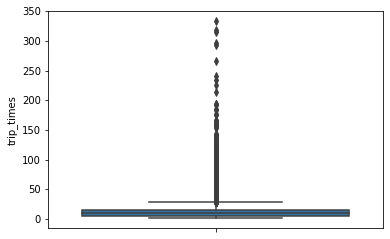

In [36]:
#box-plot after removal of outliers
sns.boxplot(y="trip_times", data =frame_with_durations_modified)
plt.show()

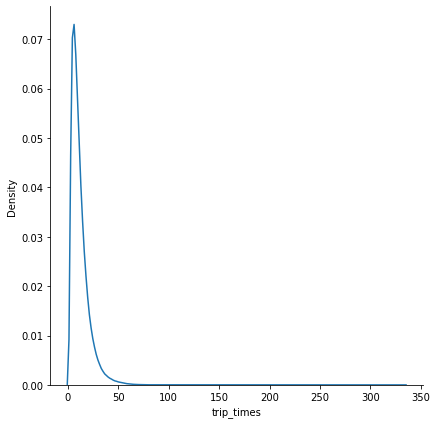

In [37]:
#pdf of trip-times after removing the outliers
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"trip_times") \
      .add_legend();
plt.show();

In [38]:
#converting the values to log-values to chec for log-normal
import math
frame_with_durations_modified['log_times']=[math.log(i) for i in frame_with_durations_modified['trip_times'].values]

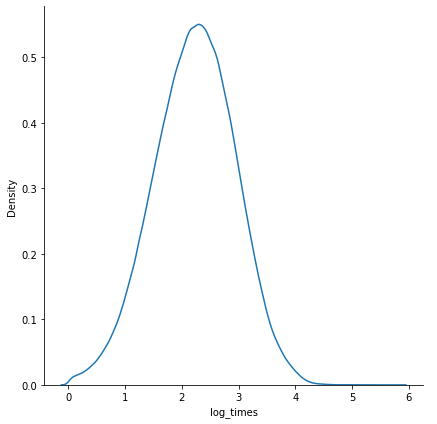

In [39]:
#pdf of log-values
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"log_times") \
      .add_legend();
plt.show();

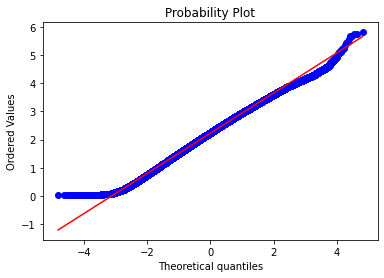

In [40]:
#Q-Q plot for checking if trip-times is log-normal
import scipy
scipy.stats.probplot(frame_with_durations_modified['log_times'].values, plot=plt)
plt.show()